In [3]:
# 연습문제 5 p244, node (18)
import numpy as np
from scipy import stats

man = [52, 60, 55, 46, 33, 75, 58, 45, 57, 88]
girl = [62, 58, 65, 56, 53, 45, 56, 65, 77, 47]

man_mean = np.mean(man)
girl_mean = np.mean(girl)

man_std = np.std(man, ddof=1)
girl_std = np.std(girl, ddof=1)

pooled_std = np.sqrt(((len(man) - 1) * man_std **2 + (len(girl) -1) * girl_std **2) / (len(man) + len(girl) -2))

sem = pooled_std * np.sqrt(1 / len(man) +1 / len(girl))
t_value = stats.t.ppf((1 +0.90) /2 , len(man) + len(girl) -2)

margin_of_error = t_value * sem

ci_lower = (man_mean - girl_mean) - margin_of_error
ci_upper = (man_mean - girl_mean) + margin_of_error

print(f"합동표준편차 : {pooled_std:.2f}")
print(f"평균생존연령의 차이에 대한 90% 신뢰구간 : ({ci_lower:.2f} < mu < {ci_upper:.2f})")


합동표준편차 : 12.83
평균생존연령의 차이에 대한 90% 신뢰구간 : (-11.45 < mu < 8.45)


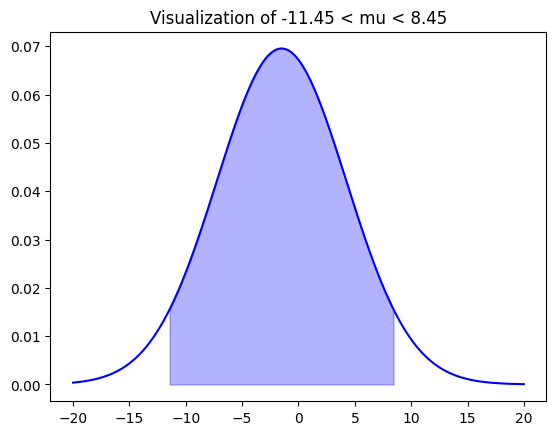

In [4]:
# 연습문제 5 p244, node (18) + 시각화
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-20, 20, 1000)
man = [52, 60, 55, 46, 33, 75, 58, 45, 57, 88]
girl = [62, 58, 65, 56, 53, 45, 56, 65, 77, 47]

man_mean = np.mean(man)
man_std = np.std(man, ddof=1)
girl_mean = np.mean(girl)
girl_std = np.std(girl, ddof=1)

pooled_std = np.sqrt(((len(man) - 1) * man_std **2 + (len(girl) -1) * girl_std **2) / (len(man) + len(girl) -2))
sem = pooled_std * np.sqrt(1 / len(man) +1 / len(girl))
pdf = (1 / (sem * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - (man_mean - girl_mean)) / sem) ** 2)
plt.plot(x, pdf, color='blue')

plt.fill_between(x, pdf, where=(x > -11.45) & (x < 8.45), color='blue', alpha=0.3)
plt.title('-11.45 < mu < 8.45')
plt.show()
